# _Neural Networks_

This is an [jupyter](http://jupyter.org) notebook.
Lectures about Python, useful both for beginners and experts, can be found at http://scipy-lectures.github.io.

Open the notebook by (1) copying this file into a directory, (2) in that directory typing 
jupyter-notebook
and (3) selecting the notebook.

***
Written By: **Riddhish Bhalodia**
***

In this exercise, we will learn about different neural network concepts. There are few prerequisites of probability and machine learning.

__Dependencies__: numpy, matplotlib, xlrd (https://github.com/python-excel/xlrd) , scikit-learn

## The Perceptron Algorithm

It is one of the example of a linear discriminant model and used for two-class clustering / separation. In this model the input bector **x** is transformed using a fixed non-linear transformation. So starting from generalized model of linear regression we have

$$ y(\textbf{x}) = \textbf{w}^T\phi(\textbf{x})$$

Now in perceptron all we do is pass this linear regression model through a non-linear activation function as follows

$$y(\textbf{x}) = f(\textbf{w}^T\phi(\textbf{x})) \quad \quad \quad (1)$$

Here, $f(.)$ is given by 
$$
f(a) = \left\{
  \begin{array}{ll}
  -1 & \quad a < 0 \\
   1 & \quad a \geq 0
   \end{array}
   \right.
$$

Now, as we have two classes $\mathcal{C}_1$ and $\mathcal{C}_2$ so we define a <u>target variable t</u> which takes the values +1 and -1 for $\mathcal{C}_1$ and $\mathcal{C}_2$ respectively. Now we need to determine the parameters **w**, for that we need to define an error function which we have to minimize.

A natural choice for the error function is total number of misclassified patterns, however this causes some problems in the learning algorithm. Hence we propose an alternate error function called the *perceptron criterion* given by 

$$ E_p(\textbf{w}) = - \sum \limits _{n \in \mathcal{M}} \textbf{w}^T \phi (\textbf{x}_n) t_n \quad \quad \quad (2)$$

Here, $\mathcal{M}$ denotes the set of all the misclassified patterns, the reasoning behind this functional can be found Christopher M Bishop's book [here](http://www.springer.com/gp/book/9780387310732) :D

### Trivial example

Here we will simplate a trivial example in the case of a 2D data within the space [-1,1] x [-1,1], and we will asumme that $\phi(x_n) = x_n \quad \forall x_n$. We first need to generate the data

In [86]:
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# now we genrate the data
N = 30
x = np.zeros(N, dtype=np.float64)
y = np.zeros(N, dtype=np.float64)
for k in range(N):
    x[k], y[k] = [np.random.uniform(-1,1) for i in range(2)]
    
a = np.random.uniform(-1,1)
b = np.random.uniform(-1,1)
c = np.random.uniform(-1,1)
label = np.ones(N) # stores the labels for two classes, 1 for C1 and -1 for C2
xa = []
ya = []
xb = []
yb = []
N1 = 0
N2 = 0

# the random line divides the points into two classes of size N1 and N2
for k in range(N):
    temp = a*x[k] + b*y[k] + c
    if temp > 0:
        xa.append(x[k])
        ya.append(y[k])
        N1 += 1
    else:
        label[k] = -1
        xb.append(x[k])
        yb.append(y[k])
        N2 += 1

Now we plot the two classes as a scatter plot!

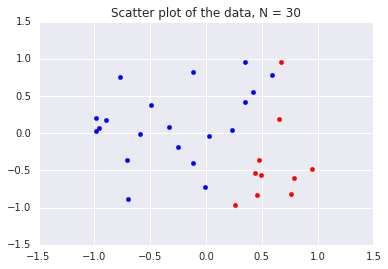

In [88]:
plt.scatter(xa, ya, color = 'b')
plt.hold(True)
plt.scatter(xb, yb, color = 'r')
plt.title('Scatter plot of the data, N = 30')

Now we want to classify this synthetic data using the perceptron model which will be trained using this data, and then we will test using the same data (this is called, self classification test). To proceed further we first need to train our perceptron model using the theory above.

Here the dimention of weight vector $\textbf{w}$ is 3 (as we just need to estimate a line). So we initilize the parameters as ones. 

In [89]:
w = np.ones(3, dtype=np.float64) # the weights
iter_max = 2000 # maximum number of iterations
error = 1000.0 # randomly initilize the classification error
it = 0 # variable to store the iteration number
eta = 0.001 # the step size (try varying this)
classified_labels = np.ones(N)

Now how do we solve for the parameters. Easy, we apply simple gradient descent on the _objective function_ (the function of the parameters to be estimated, which is to be minimized). So we take the derivative of the equation (2) and we get

$$ \textbf{w}^{(l+1)} = \textbf{w}^{(l)} + \eta \sum \limits_{n \in \mathcal{M}} \phi (\textbf{x}_n) t_n $$

So now we start coding the actual parameter estimation part. 

In [90]:
while (error != 0 and it < iter_max):
    # Update Rules
    temp_vec = np.zeros(3, dtype=np.float64)
    temp = np.zeros(3, dtype=np.float64)
    for i in range(N):
        if label[i] != classified_labels[i]:
            temp += eta * np.array([x[i], y[i], 1]) * label[i]
    w += temp
    # recompute the classification
    for i in range(N):
        temp1 = w[0]*x[i] + w[1]*y[i] + w[2]
        if temp1 > 0:
            classified_labels[i] = 1
        else:
            classified_labels[i] = -1
            
    # compute the misclassification error
    error = 0
    for i in range(N):
        temp1 = w[0]*x[i] + w[1]*y[i] + w[2]
        if label[i] != classified_labels[i]:
            error += - label[i] * temp1
    
    w = w / np.linalg.norm(w, ord=2)
    it +=1

print("Done!")

Done!


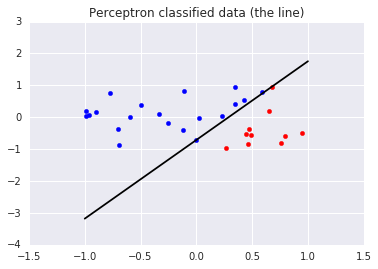

In [91]:
x = np.linspace(-1,1,100)
y = -(w[0] * x + w[2]) / w[1]
plt.scatter(xa, ya, color = 'b')
plt.hold(True)
plt.scatter(xb, yb, color = 'r')
plt.plot(x,y, color='k')
plt.title('Perceptron classified data (the line)')

We can see that this perceptron model classifies the data very well :) lest check how close the weights are to the actual line we took to generate the data

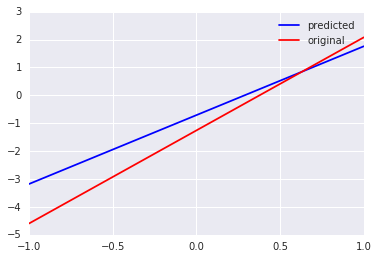

In [92]:
x = np.linspace(-1,1,100)
y = -(w[0] * x + w[2]) / w[1]
plt.plot(x,y,color='b')
x = np.linspace(-1,1,100)
y = -(a * x + c) / b
plt.hold(True)
plt.plot(x,y,color='r')
plt.legend(['predicted', 'original'])

Try changing the N and see how the prediction changes! Now we will move on to see how this will help us in neural networks. Also if the system does not work, then try changing the eta and iterations (they may need to be tuned as we are generating different random data each time). Also the lines need not be equal as the same partition can be achieved with different lines :)

## Multilayer Perceptron

### Brief Intro to Neural Networks

In very short and sweet terms neural networks aims at making mathematical constructs for information processing mimicing biological systems. Disregarding several constraints that actual biological construct gives us, we can use the core idea of neural networks for many pattern recognition applications, the following aspects of the theory are taken from Christopher Bishop's book.

### The most basic..

The _multilayer perceptron_ that we are going to discuss now is one of the most simplest and widely used models for neural networks, it's also known as _Feed Forward Networks_. 
The goal is to extend the regression model by making the $\phi (x_j)$ depend on some parameters which are to be estimated along with the set of weights $\{w\}_j$. So by (3) we now use simple linear comination to describe the neural network in terms of series of functional transformations

(A) M linear combinations of the inputs $(x_1,...,x_D)$ to generate activations

$$a_j = \sum \limits_{i=1}^D w_{ji}^{(1)}x_i + w_{j0}^{(1)} \quad \quad \quad (3)$$

The superscript (1) denotes the first layer of the neural network.

(B) Transformation of activations by a _differentiable, non-linear activation function_ h(.)

$$z_i = h(a_i) \quad \quad \quad (4)$$

these $z_i$ are the _hidden units_ and the two equations (3) and (4) combine to what looks like a perceptron model. 

(C) Similar to inputs we have output activations which are constructed by linearly combining the hidden units

$$a_k = \sum \limits_{j=1}^{M} w_{kj}^{(2)}z_j + w_{k0}^{(2)} \quad \quad \quad (5)$$

(D) Lastly the output activations passed through a non-linear activation function gives the network outputs

$$y_k = \sigma (a_k) \quad \quad \quad (6)$$

These steps can be represented as the following figure 

 <figure>
  <img src="neural_net.jpg" width="404" height="328">
  <figcaption><center>Fig1. - Two hidden layer neural network (example of multi-layer perceptron)</center></figcaption>
</figure>

The model is _forward propogating_, and once we put the $x_0 = 1$ and join the bias weight to the set of weights we can see why this looks like a multilayer perceptron model. The key difference is that hidded units use continious (sigmoidal) non-linearities which makes the overall network function (by combimining all the steps) differetiable wrt the parameters, which helps in smooth training as we will see further.

Now all we need to do to train this model is the following two steps (this is true for most of the cases)
* Find the gradient of the error function wrt to the paramenters
* Update the parameters using an update scheme (we usually use gradient descent for this)

Well the trouble is a first step, we need to come up with an efficient way to compute the gradients of the neural network, for this be will use an algorithm whic is used in normal network to transmit messages backword and forward, and it's called **backward propogation** or **backpropogation**

## Error Back Propogation

_Goal is to have an efficient technique to compute gradients of the error functionals effectively, which when used with gradient descent allows us to train the neural network_

We will derive the back propogation algorithm for a general network having a arbitary _feed-forward topology_ and arbitary _non-linear differentiable activation functions_.

The error function defined by maximum likelihood estimate for i.i.d data is a sum of individual error functions!

$$E(\textbf{w}) = \sum \limits_{n=1}^N E_n(\textbf{w}) \quad \quad \quad (7)$$

In a general feed-forward network the each hidden unit computes a weighted sum of it's inputs in the form

$$a_j = \sum \limits_i w_{ji}z_i \quad \quad \quad (8)$$

$z_i$ is activation of inputs / units which sends connection to unit j and $w_{ji}$ is weight of that connection. Now h(.) is a non-linear function which computes the activations of the next layer. Vizualize this as a network

$$z_j = h(a_j) \quad \quad \quad (9)$$

Now moving into the actual training phase, for each pattern in the training set we shall suppose we have all the input vectors and activations already computed (this process in called _forward propogation_).
So computing gradients we take the derivative of $E_n$ wrt $w_{ji}$

$$\frac{\partial E_n}{\partial w_{ji}} = \frac{\partial E_n}{\partial a_j}\frac{\partial a_j}{\partial w_{ji}} \quad \quad \quad (10)$$

Lets name $\delta_j = \frac{\partial E_n}{\partial a_j}$, these $\delta_j$ are called _errors_. On top of this we know that from eq (8) $\frac{\partial a_j}{\partial w_{ji}} = z_i$. Hence, we have

$$\frac{\partial E_n}{\partial w_{ji}} = \delta_j z_i \quad \quad \quad (11)$$

Now for computing the gradient we only need to find the errors ($\delta_j$) for output and hidden units. For the output units we have (think about this intuitively)

$$\delta_k = y_k - t_k \quad \quad \quad (12)$$


Now let us vizualize how our network looks like again
<figure>
<img src="net.png"></img>
<figcaption><center>Fig2. - Error flow along the network</center></figcaption>
</figure>
By this the hidden units will be of the form 

$$\delta_j = \frac{\partial E_n}{\partial a_j} = \sum \limits_{k} \frac{\partial E_n}{\partial a_k} \frac{\partial a_k}{\partial a_j} \quad \quad \quad (13)$$

This means that the variations in of $a_j$ give rise to the variations in the error function only through the variations in variable $a_k$.
Now by using equations (13), (8) and (9) we can arrive at the _backpropogation formula_
***
$$ \delta_j = h'(a_j)\sum \limits_{k} w_{kj}\delta_k \quad \quad \quad (14)$$
***

### Summary

1) Apply the input vector $x_n$ to network and forward propogate to find all the activations of all the hidden units and output units

2) Evaluate $\delta_k$ for all output units by equation 12

3) Back propogate the $\delta$'s by equation 14, getting $\delta_i$ for each hidden unit

4) Use $\frac{\partial E_n}{\partial w_{ji}} = \delta_j z_i$ to compute derivatives

It's a fairly intuitive algorithm once you understand that how the error "flows" backward from the network. So we will start implementing this now, but first let me describe the application.

We will implement a simple _two layer neural network_ (one hidden layer as in Fig 1) in form of a class that then can be used for several applications! Also we will have the output activation function as identity, i.e. $y_k = a_k$, and the hidden layer activation function as 

$h(a) = tanh(a) = \frac{e^a - e^{-a}}{e^a + e^{-a}}$

So let's get started! First we define some simple functions for computing the activation function and it's derivative
In the last application we will use sigmoid function as activation so we define that too (check the defination online)

In [93]:
def tanh(x):
    return np.tanh(x)

def tanh_derv(x):
    # work the math out
    return 1.0 - np.tanh(x)**2

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_derv(x):
    return sigmoid(x)*(1-sigmoid(x))

Now lets start with the class definition

So essentially the weights in the class is the list of arrays of weights between two layers, for example if the layers = [2,3,2], that will result in the figure 1 exactly. we will have weights[0] = 3x4 matrix and weights[1] = 4x2 matrix (refer to the figure one and see how this makes sense).

Now we move to training this neural network, where we will apply an algorithm called _stochastic gradient descent_ its is same as standard gradient descent except for the fact that it makes an update to the weight vector using a single data point at a time. These data points are either selected by cycling through the data or choosing randomly. So we have

$$\textbf{w}^{(\tau + 1)} = \textbf{w}^{(\tau)} - \eta \nabla E_n(\textbf{w}^{(\tau)}) \quad \quad \quad (15)$$

So now using the above information we can substitute the value of the gradient we found by back propogation in the stochastic gradient equation. This is what we will use to write the training function for the class.

In [108]:
class neural_network:
    def __init__(self, layers, actfn):
        """
        layers: A list containing the number of units in each layer.
                Should be at least two values (this also includes the input layer)
        actfn : String to select the type of activation function
        """
        if actfn == 'tanh':
            self.act_fn = tanh # the activation function of the hidden layers
            self.act_fn_derv = tanh_derv # the derivative of the activation function of the hidden layers
        if actfn == 'sigmoid':
            self.act_fn = sigmoid # the activation function of the hidden layers
            self.act_fn_derv = sigmoid_derv # the derivative of the activation function of the hidden layers
            
        self.weights = [] # list of the weights
        # now we need to initialize these weights
        # We have to keep in mind that every layer except for the output will have one extra bias unit
        # we initialize the weights randomly between [-0.5,0.5]
        
        for i in range(1,len(layers) - 1):
            self.weights.append(0.5 * (2 * np.random.random([layers[i-1] + 1, layers[i] + 1]) - 1))
        
        # and for between the last hidden layer and the output layer
        self.weights.append(0.5 * (2 * np.random.random([layers[i] + 1, layers[i + 1]]) - 1))
    
    # This is the training function
    def train(self, X, t, eta = 0.05, max_iter = 10000):
        """
        X: Training data input set X = Nxdi, di= dimension of the input data > 1, N = number of data points
        t: Training data output set, t = Nxdo , do = dimension of the output data
        eta : double
            it is the step size for the stochastic gradient descent
        max_iter : int
            Number of iterations of the gradient descent
        """
        
        # first we need to add another unit to the input
        # as the input we have provided does not have a 
        # bias input (which we set as one)
        X = np.atleast_2d(X) # google this command! it's just for smooth computation of matrices
        temp = np.ones((X.shape[0], X.shape[1] + 1))
        temp[:, 0:X.shape[1]] = X
        X = temp
        
        # Now for the stochastic gradient descent iterations
        
        for k in range(max_iter):
            # choose one of the input randomly (which is what we do in the stochastic gradient descent)
            i = np.random.randint(X.shape[0]) 
            # First the forward pass to get all the estimates
            a = [X[i]] # this is the input we will use, it will also store all the activations and inputs
            # for each hidden + output layer
            for j in range(len(self.weights)):
                # get the units and pass them through activation function
                z = self.act_fn(a[j].dot(self.weights[j]))
                # append to the activation list
                a.append(z)
                
            # compute the error from the target data
            err = t[i] - a[-1] # the -1 gives the last element = output of the net
            
            # Backward pass to estimate all deltas
            
            # first generate a list of delts for each layer 
            deltas = [err * self.act_fn_derv(a[-1])] # this is by combining eq(12) and (14)
            
            # we start from the second to last layer and go till the input (backward is the word)
            for j in range(len(a) - 2, 0, -1): 
                # first apply backpropogation formula (14)
                bp = self.act_fn_derv(a[j]) * deltas[-1].dot(np.transpose(self.weights[j]))
                # now append it to deltas
                deltas.append(bp)
            
            # the deltas are in from output to input order so we reverse it
            deltas.reverse()
            # compute the gradient and apply the update
            for j in range(len(self.weights)):
                # Some precessing for the product computation and robustness, google the command atleast_2d
                frl = np.atleast_2d(a[j])
                bwl = np.atleast_2d(deltas[j])
                # Application of equation (11) and (15)
                self.weights[j] += eta * np.transpose(frl).dot(bwl)
                
    # now the prediction step
    def predict_out(self, x):
        """
        x: The input data to which we have to give the output
        """
        # this is a simple forward pass like w did in the training except just the output is needed
        x = np.array(x)
        temp = np.ones(x.shape[0] + 1)
        temp[0:x.shape[0]] = x
        a = temp
        for j in range(len(self.weights)):
            a = self.act_fn(a.dot(self.weights[j]))
            
        return a

Now that concludes our code for a general neural network! Now let us look how it works, first lets take a very simple example.

## The Standard XOR implementation

I leave it to the reader to figure out why does the simple single layer perceptron model will not work for XOR (google is your friend here, plus here is a [reference](http://computing.dcu.ie/~humphrys/Notes/Neural/single.neural.html)).

So we have a three(input - hidden - output) layer neural network for solving the logical XOR, so lets get right onto it.

<figure>
<img src="xor.jpeg"></img>
<figcaption><center>Fig3. - XOR Logical function and gate</center></figcaption>
</figure>

In [109]:
nn = neural_network([2,2,1], 'tanh')
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 1, 1, 0])

# now train on this data
nn.train(inputs, targets)
for i in [[0, 0], [0, 1], [1, 0], [1,1]]:
    print(i,nn.predict_out(i))

([0, 0], array([ 0.00567015]))
([0, 1], array([ 0.98817739]))
([1, 0], array([ 0.9924419]))
([1, 1], array([ 0.00716997]))


We see this works pretty well where the perceptron totally fails! Now lets do something more challanging.

## The simulated data sectioned with non-linear function

We again generate the data but now not linerealy separated, so lets first do that

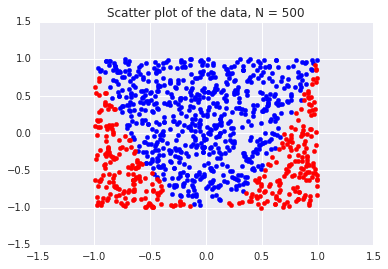

In [110]:
N = 1000
x = np.zeros(N, dtype=np.float64)
y = np.zeros(N, dtype=np.float64)
for k in range(N):
    x[k], y[k] = [np.random.uniform(-1,1) for i in range(2)]
    
label = np.ones(N) # stores the labels for two classes, 1 for C1 and -1 for C2
xa = []
ya = []
xb = []
yb = []
N1 = 0
N2 = 0

# lets take the function y = 2x^2 - 1 to divide the points
for k in range(N): 
    temp = y[k] - 2*x[k]**2 + 1
    if temp > 0:
        xa.append(x[k])
        ya.append(y[k])
        N1 += 1
    else:
        label[k] = -1
        xb.append(x[k])
        yb.append(y[k])
        N2 += 1
        
plt.scatter(xa, ya, color = 'b')
plt.hold(True)
plt.scatter(xb, yb, color = 'r')
plt.title('Scatter plot of the data, N = 500')

Now lets try to apply again the three layer neural network to make the classification and see how the self and cross classification error comes into play.

We work with self classification here, if one wants to modify the implementation of cross validation, the choose random 10% of the data to be kept as testing and train the model on remaining 90%, and then compare the classification accuracy.

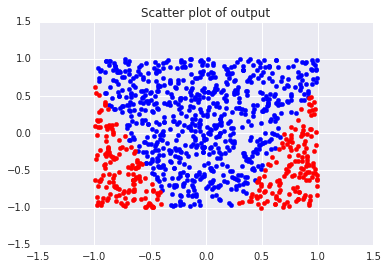

In [111]:
nn = neural_network([2, 2, 1], 'tanh')
inputs = np.zeros([N, 2])
inputs[:,0] = x
inputs[:,1] = y
nn.train(inputs, label, eta = 0.05)
labelout = np.ones(N)
xao = []
yao = []
xbo = []
ybo = []
for i in range(N):
    out = nn.predict_out(inputs[i,:])
    if(out > 0):
        xao.append(inputs[i,0])
        yao.append(inputs[i,1])
    else:
        xbo.append(inputs[i,0])
        ybo.append(inputs[i,1])
        labelout[i] = -1
        
plt.scatter(xao, yao, color = 'b')
plt.hold(True)
plt.scatter(xbo, ybo, color = 'r')
plt.title('Scatter plot of output')

The plot looks really similar, we compute the classification error by absolute difference between two label maps

In [112]:
# Self classification error
err = np.sum(np.abs(label - labelout))
err = err / len(label)
print('Self Classification Error = ', err)

('Self Classification Error = ', 0.080000000000000002)


Now these is all simulated talk, let us look at some real life applications of neural networks. There are several things where even basic neural networks makes a lot of impact. People use it for image classification, digit recognition, financial data analysis, time series prediction, weather predtion etc.

## Real Application! Breast Tissue Classification

Breast cancer is one of the major cause for mortality in women, but if detected in earlier stage then there are methods available to cure it. That is why it's imperative that we develop new techniques for it's identifacation and detection. For detection of breast cancer lesion, it's really important that we know in which class does the breast tissue lies in. Hence as a preliminary step if we know the tissue class it would be really helpful, hence we are trying to use neural network to see if we can classify the tissues.

First we will need a dataset, and a description of input and output variables
We use the dataset given http://archive.ics.uci.edu/ml/datasets/Breast+Tissue (it is in the XLS file along with the notebook)

#### Dataset Description

There are 106 instances of the data, each having 10 attributes, 9 features + 1 class

The output classes of the breast tissues are as follows

| Class         | Class attribute | Number of Cases |
|---------------|-----------------|-----------------|
| Carcinoma     | Car             | 21              |
| Fibro-adenoma | Fad             | 15              |
| Mastopathy    | Mas             | 18              |
| Glandular     | Gla             | 16              |
| Connective    | Con             | 14              |
| Adipose       | Adi             | 22              |

Now all the features(inputs) are listed as follows (in the same order)

|Type   | Description                                                      |
|-------|------------------------------------------------------------------|
|I0	    |Impedivity (ohm) at zero frequency                                |
|PA500	|Phase angle at 500 KHz                                            |
|HFS	|High-frequency slope of phase angle                               |
|DA	    |Impedance distance between spectral ends                          |
|AREA	|Area under spectrum                                               |
|A/DA	|Area normalized by DA                                             |
|MAX IP	|Maximum of the spectrum                                           |
|DR	    |Distance between I0 and real part of the maximum frequency point  |
|P	    |Length of the spectral curve                                      |

A sample data is given like 


_(1, car, 524.794072, 0.187448362, 0.032114058, 228.8002279, 6843.598481, 29.91080273, 60.20487976, 220.737212, 556.8283342)_

Here, the parameters after the _car_ class atrribute are the fetures in order as described in the table above.

Now as this is a prediction problem we can use neural network to it's fullest, all we have to worry about is how many layers should we choose and the number of hidden units in each of them . Well as this problem has fairly small number of inputs and outputs a single hidden layer should suffice, and as an emperical rule we should choose between [n, 3n+1] hidden units (n = number of inputs) so let us use 20 hidden units.
Also one more thing to keep in mind is we will associate classes with binary numbers for each of the class.

But lets first read the xls file and turn it in the format we want for our neural network training, you will need xlrd package for reading the xls file (https://github.com/python-excel/xlrd)

In [113]:
import xlrd

book = xlrd.open_workbook('BreastTissue.xls')
# this has two sheets in it first one is of description and the second is data (which is what we want)
print(book.sheet_names())
sh = book.sheet_by_index(1) # the sheet for data
# we see the dimentions
print('number of rows', sh.nrows, 'number of coloumns', sh.ncols)
# we do not want the 1st row and the first coloumn (SEE THE DATA FILE)
# The second coloumn is of the class and the rest are feature points
# So we define the input and output

X = np.zeros([sh.nrows - 1, sh.ncols - 2]) # input to NN
y = np.zeros([sh.nrows - 1 , 6] , dtype=np.float64) # output of NN for training

for i in range(1,sh.nrows):
    temp = np.str(sh.row(i)[1].value)
    if temp == 'car':
        y[i-1, 0] = 1
    if temp == 'fad':
        y[i-1, 1] = 1
    if temp == 'mas':
        y[i-1, 2] = 1
    if temp == 'gla':
        y[i-1, 3] = 1
    if temp == 'con':
        y[i-1, 4] = 1
    if temp == 'adi':
        y[i-1, 5] = 1
    for j in range(2,sh.ncols):
        X[i-1,j - 2] = sh.row(i)[j].value

[u'Description', u'Data']
('number of rows', 107, 'number of coloumns', 11)


In [114]:
# we also have to normalize the data before using it
for i in range(9):
    X[:,i] = 1 - (X[:,i] - np.min(X[:,i])) / (np.max(X[:,i]) - np.min(X[:,i]))
    

We will test the self classification, and see how the test performs. The parameters are set after extreme experimentation :D, change them at own risk :P

In [120]:
nn = neural_network([9, 17, 6], 'sigmoid')
nn.train(X, y, eta = 0.5, max_iter = 50000)
misshits = 0
# First the self classification error
for i in range(X.shape[0]):
    temp = nn.predict_out(X[i,:])
    temp[temp != np.max(temp)] = 0
    temp[temp > 0] = 1
    misshits += np.sum(np.abs(temp - y[i,:])) / 2.0 # think why this would be misshits 
#     print("predicted", temp)
#     print("actual", y[i,:])
print("Self Classification numer of misshits out of 106", misshits)

('Self Classification numer of misshits out of 106', 69.0)


This classification does not work well, but in neural networks there are many things which can be introduced which will make this system extremely good (one of them is momentum, read it if interested). This same problem is tackled [here](http://neuroph.sourceforge.net/tutorials/BreastTissueClassification/BreastTissueClassification.html) and they use additional things to reach their required accuracy . Also maybe this system works for some other parameters who knows :D. 

We are now just looking at the misshits, but that does not give us a correct indication of how are the errors due to the neural networks distributed. For this we use something called as a _confusion matrix_ (https://en.wikipedia.org/wiki/Confusion_matrix), it is a simple idea do read the wikipedia article before moving further. So lets construct the confusion matrix!

In [104]:
import sklearn
from sklearn.metrics import confusion_matrix

# Figure out why our confusion matrix will be of size 6x6
predict_arr = []
actual_arr = []
for i in range(X.shape[0]):
    temp = nn.predict_out(X[i,:])
    temp[temp != np.max(temp)] = 0
    temp[temp > 0] = 1
    if temp[0] == 1.0:
        predict_arr.append('car')
    if temp[1] == 1.0:
        predict_arr.append('fad')
    if temp[2] == 1.0:
        predict_arr.append('mas')
    if temp[3] == 1.0:
        predict_arr.append('glu')
    if temp[4] == 1.0:
        predict_arr.append('con')
    if temp[5] == 1.0:
        predict_arr.append('adi')
    
    temp = y[i,:]
    if temp[0] == 1:
        actual_arr.append('car')
    if temp[1] == 1:
        actual_arr.append('fad')
    if temp[2] == 1:
        actual_arr.append('mas')
    if temp[3] == 1:
        actual_arr.append('glu')
    if temp[4] == 1:
        actual_arr.append('con')
    if temp[5] == 1:
        actual_arr.append('adi')

conf_mat = confusion_matrix(actual_arr, predict_arr, labels = ['car', 'fad', 'mas', 'glu', 'con', 'adi'])


In [105]:
conf_mat

array([[18,  0,  3,  0,  0,  0],
       [ 1,  6,  2,  6,  0,  0],
       [ 2,  5,  6,  5,  0,  0],
       [ 0,  2,  3, 11,  0,  0],
       [ 0,  0,  4,  0,  8,  2],
       [ 0,  0,  0,  0,  0, 22]])

Lets do some stylish plotting

([<matplotlib.axis.YTick at 0x10b71da50>,
 <a list of 6 Text yticklabel objects>)

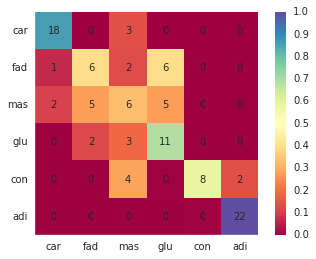

In [106]:
conf_arr = conf_mat

norm_conf = []
for i in conf_arr:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = ax.imshow(np.array(norm_conf), cmap=plt.cm.Spectral, 
                interpolation='none')
ax.grid('off')
width, height = np.array(conf_arr).shape

for x in xrange(width):
    for y in xrange(height):
        ax.annotate(str(conf_arr[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

cb = fig.colorbar(res)
alphabet = ['car', 'fad','mas', 'glu', 'con', 'adi']
plt.xticks(range(width), alphabet[:width])
plt.yticks(range(height), alphabet[:height])

There seems to be an pbvious function generation problem as the classes 'fad' and 'glu' are mostly classified as 'mas', so using additional parameters and data in the training this can be fixed. This concludes my attempt at explaining neural networks and multi-layer perceptron algorithm. Maybe I put some more algorithms in neural networks, let's see.

~Adios

PS: I do hope you guys enjoyed this!

## References

[1] http://neuroph.sourceforge.net/ for taking project inspiration

[2] Jossinet J (1996) Variability of impedivity in normal and pathological breast tissue. Med. & Biol. Eng. &     Comput, 34: 346-350. Silva JE, Marques de Sá JP, Jossinet J (2000) Classification of Breast Tissue by Electrical Impedance Spectroscopy. Med & Bio Eng & Computing, 38:26-30.

[3] Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science

[4] All the theory was from Christopher Bishop's Book, "Pattern Recognition and Machine Learning"